# Tools

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lukeconibear/intro_ml/blob/main/docs/01_fundamentals.ipynb)

In [1]:
# if you're using colab, then install the required modules
import sys

IN_COLAB = "google.colab" in sys.modules
if IN_COLAB:
    pass

## Overview

There is huge variety of machine learning and deep learning tools.

In this course, we'll focus on:

- [scikit-learn](scikit-learn)
- [TensorFlow](tensorflow)
- [PyTorch](pytorch)
- [JAX](jax)

The tool you choose depends on:

- Your research problem
- Model availability (e.g., pre-trained, state-of-the-art)
- Deployment (e.g., hardware)
- Ecosystem (e.g., compatibility with other tools)
- Personal preferences

There are many discussions on the different choices e.g., [1](https://www.assemblyai.com/blog/pytorch-vs-tensorflow-in-2022/), [2](https://keras.io/why_keras/).

(scikit-learn)=
### [scikit-learn](https://scikit-learn.org/stable/)

Scikit-learn has a wide range of simple and efficient machine learning tools.  

- [Documentation](https://scikit-learn.org/stable/user_guide.html)
- [Tutorials](https://scikit-learn.org/stable/tutorial/index.html)
- [Examples](https://scikit-learn.org/stable/auto_examples/index.html)

There are ones for:

- [Linear models](https://scikit-learn.org/stable/modules/linear_model.html) ([examples](https://scikit-learn.org/stable/auto_examples/index.html#generalized-linear-models))
- [Nearest neighbours](https://scikit-learn.org/stable/modules/neighbors.html) ([examples](https://scikit-learn.org/stable/auto_examples/index.html#nearest-neighbors))
- [Support vector machines](https://scikit-learn.org/stable/modules/svm.html) ([examples](https://scikit-learn.org/stable/auto_examples/index.html#support-vector-machines))
- [Decision trees](https://scikit-learn.org/stable/modules/tree.html) ([examples](https://scikit-learn.org/stable/auto_examples/index.html#decision-trees))
- And [many more](https://scikit-learn.org/stable/index.html#).

(tensorflow)=
### [TensorFlow](https://www.tensorflow.org/)

Tensorflow is an end-to-end open source machine learning platform.

- [Documentation](https://www.tensorflow.org/guide)
- [Tutorials](https://www.tensorflow.org/tutorials)
- [Examples](https://keras.io/examples/)

TensorFlow has use-friendly higher-level APIs (Application Programming Interface)

- [Keras](https://keras.io/)
- [Sonnet](https://sonnet.readthedocs.io/en/latest/)

Keras includes a wide range of high-level objects including:

- [Models](https://keras.io/api/models/)
- [Layers](https://keras.io/api/layers/)
    - [Activations](https://keras.io/api/layers/activations) e.g., sigmoid
    - [Weight initialisers](https://keras.io/api/layers/initializers/) e.g., HeNormal
    - [Regularisers](https://keras.io/api/layers/regularizers/) e.g., L2
    - [Convolutional](https://keras.io/api/layers/convolution_layers/) e.g., Conv2D
    - [Pooling](https://keras.io/api/layers/pooling_layers/) e.g., MaxPooling2D
    - [Recurrent](https://keras.io/api/layers/recurrent_layers/) e.g., LSTM (long-short-term-memory)
    - [Preprocessing](https://keras.io/api/layers/preprocessing_layers/) e.g., vectorisation
- [Optimisers](https://keras.io/api/optimizers/) e.g., Adam
- [Losses](https://keras.io/api/losses/) e.g., MeanSquaredError
- [Metrics](https://keras.io/api/metrics/) e.g., Accuracy


You can always go to the lower-level API, which is useful for custom objects.

- [Model subclassing](https://blog.tensorflow.org/2019/01/what-are-symbolic-and-imperative-apis.html)
    - Similar to PyTorch
- [Automatic differention](https://www.tensorflow.org/guide/autodiff) with `tf.GradientTape()`  
- ...

There are many [libraries and extensions](https://www.tensorflow.org/resources/libraries-extensions) including:

- [TensorFlow Extended](https://www.tensorflow.org/tfx) for deployment.
- [TensorFlow Lite](https://www.tensorflow.org/lite/guide) for mobile and IoT (internet of things) devices.
- [TensorBoard](https://www.tensorflow.org/tensorboard) for visualising the experiment results.

A model consists of many layers.

Each layer is an input-output transformation.

These models and layers can be built using either the [Sequential](https://keras.io/guides/sequential_model/) or [Functional](https://keras.io/guides/functional_api/) API (application programming interface).

| Sequential | Functional |
| --- | --- |
| Linear stack of layers. | Non-linear DAG (directed acyclic graph) of layers (can be shared). |
| Each layer has one input and one output. | Each layer can have multiple inputs and outputs. |

Hence, the Sequential API is simpler and the Functional API is more flexible and suitable for complicated models.

(pytorch)=
### [PyTorch](https://pytorch.org/)

PyTorch is an end-to-end open source machine learning platform.

- [Documentation](https://pytorch.org/docs/stable/index.html)
- [Tutorials](https://pytorch.org/tutorials/)

PyTorch has use-friendly higher-level APIs:

- ...

- [fastai](https://docs.fast.ai/)
    - A high-level API for PyTorch.
- [PyTorch Lightning](https://pytorch-lightning.readthedocs.io/en/latest/)
    - Helps write boilerplate code, scale out to multiple devices, and other helpful things.

You can always go to the lower-level API, which is useful for custom objects.

- ...


There are many [libraries and extensions](https://pytorch.org/ecosystem/) including:

- [TorchServe](https://pytorch.org/serve/) for deployment.
- [Pytorch Live](https://pytorch.org/live/) for mobile and IoT devices.
- [GPyTorch](https://gpytorch.ai/) for Gaussian Processes.

(jax)=
### [JAX](https://jax.readthedocs.io/en/latest/#)

JAX is library for GPU accelerated NumPy with automatic differentiation.

- [Documentation](https://jax.readthedocs.io/en/latest/index.html)
- [Tutorials](https://jax.readthedocs.io/en/latest/jax-101/index.html)

There are many tools built upon JAX, including:

- [Flax](https://github.com/google/flax)
    - A neural network library and ecosystem for JAX that is designed for flexibility.
- [Haiku](https://dm-haiku.readthedocs.io/en/latest/)
    - Built on top of JAX to provide simple, composable abstractions for machine learning research.

## Example - Linear regression

Let's start with a simple example fitting a straight line to data.

We'll see how this in done in each of three key tools we cover here: scikit-learn, TensorFlow, and PyTorch.

Let's create some (noisy) data to train on:

In [15]:
import numpy as np

In [17]:
def create_noisy_linear_data(num_points):
    x = np.arange(num_points)
    noise = np.random.normal(0, 1, num_points)
    y = 2 * x + noise
    # convert to 2D arrays
    x, y = x.reshape(-1, 1), y.reshape(-1, 1)
    return x, y

In [4]:
x_train, y_train = create_noisy_linear_data(10)

```{caution} 

Input arrays to models needs to be 2 dimensional (2D) i.e., a column of rows.

For example, instead of one row:

`>>> np.arange(10)`  
`array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])`  

Convert this to a column of rows using `.reshape(-1, 1)`:  

`>>> np.arange(10).reshape(-1, 1)`  
`array([[0],`  
`       [1],`  
`       [2],`  
`       [3],`  
`       [4],`  
`       [5],`  
`       [6],`  
`       [7],`  
`       [8],`  
`       [9]])`  

```

### scikit-learn

First, let's try with [scikit-learn](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html):

In [5]:
from sklearn import linear_model

In [6]:
model_sklearn = linear_model.LinearRegression()

When fit is called for Linear Regression, the _loss_ that is trying to be minimised is the _mean squared error_ between the predictions and the actual values.

This determines what parameters the model learns.

In [7]:
model_sklearn.fit(x_train, y_train)

LinearRegression()

The data was from the line `y = 2x`, so the gradient was 2.

Let's see what the model estimated it to be:

In [8]:
gradient = model_sklearn.coef_[0]
intercept = model_sklearn.intercept_

gradient

array([1.93700795])

Pretty close, considering there was only 10 training data points.

### TensorFlow

Now, for **TensorFlow**:

In [9]:
import tensorflow as tf

2022-03-17 12:03:00.999290: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-17 12:03:00.999305: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Create the model.

It's helpful to name the layers in the model.

In [68]:
model_tf = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(1,), name="input"),
        tf.keras.layers.Dense(units=1, name="layer1"),
    ]
)

You can now show the model summary.

Note, this only shows layers (not the `Input` object).

In [69]:
model_tf.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


You can also show the model graph:

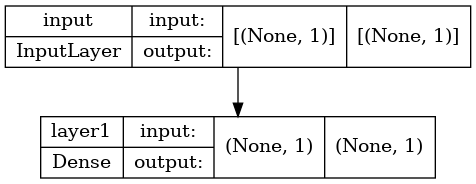

In [70]:
tf.keras.utils.plot_model(model_tf, show_shapes=True)

Now, compile the model.

The keyword arguments to `optimizer`, `loss`, and `metrics` can either be strings (e.g., `mean_squared_error`) or TensorFlow objects (e.g., `tf.keras.metrics.mean_squared_error`)

In [88]:
model_tf.compile(
    optimizer="sgd",  # how to reduce the loss
    loss="mean_squared_error",  # what to minimise (i.e., proxy for metric)
    metrics=["accuracy"],  # what actually care about
)

And, train the model:

In [89]:
model_tf.fit(
    x_train,
    y_train,  # the training data
    epochs=10,  # how many runs through the training data
    verbose=False,  # print out the metrics per epoch
);

And, let's see what this model though the gradient was:

In [90]:
model_tf.weights[0].numpy()

array([[1.8544292]], dtype=float32)

Now, we can see how well these models fit a line to the data:

In [331]:
y_pred_sklearn = model_sklearn.predict(x_train)

In [332]:
y_pred_tf = model_tf.predict(x_train)

In [21]:
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

params = {"font.size": 14, "text.usetex": True}
matplotlib.rcParams.update(params)

In [22]:
colors = {"data": "#1b9e77", "sklearn": "#d95f02", "tf": "#7570b3"}

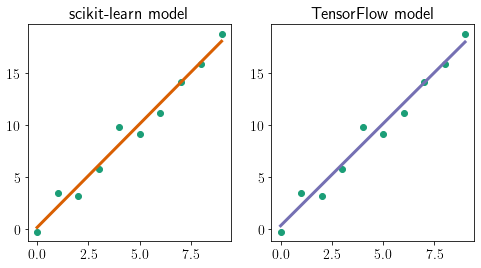

In [335]:
fig = plt.figure(1, figsize=(8, 4))
ax1, ax2 = fig.subplots(1, 2)

ax1.scatter(x_train, y_train, color=colors["data"])
ax1.plot(x_train, y_pred_sklearn, color=colors["sklearn"], linewidth=3)
ax1.set_title("scikit-learn model")

ax2.scatter(x_train, y_train, color=colors["data"])
ax2.plot(x_train, y_pred_tf, color=colors["tf"], linewidth=3)
ax2.set_title("TensorFlow model")

plt.show()

They both did a good job of fitting a function to the data.

In other words, they found the association in the data.

However, this was a very simple example that probably didn't require machine learning (let alone deep learning).

Though it demonstrates what they do.

Now, let's look at something a little more complicated.

## Example - Digit classification

Let's train a model to recognise digits.

This is a classification task.

### scikit-learn

First, with [scikit-learn](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html):

In [202]:
from sklearn import datasets, linear_model, metrics, svm
from sklearn.model_selection import train_test_split

#### Load the data

In [203]:
digits = datasets.load_digits()

Take a look at the labelled data:

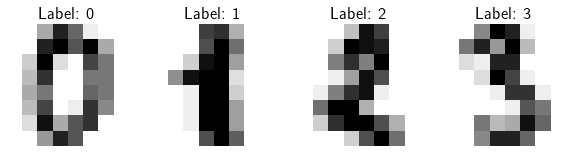

In [204]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Label: {label}")

#### Preprocess and split the data

In [205]:
def preprocess_data(digits):
    # the data comes as 2D 8x8 pixels
    # flatten the images to 1D 64 pixels
    n_samples = len(digits.images)
    data = digits.images.reshape((n_samples, -1))
    return n_samples, data

In [206]:
n_samples, data = preprocess_data(digits)

In [207]:
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

#### Create a model

Here, we will use a [Support Vector Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) (a type of support vector machine).

This model focuses on the two hardest to classify examples and places support vectors between them to form the decision boundary.

In [208]:
model = linear_model.LogisticRegression()

In [215]:
model = svm.SVC(gamma=0.001)

#### Fit the model to the training data

In [216]:
model.fit(X_train, y_train)

SVC(gamma=0.001)

#### Use the model to predict the test data

In [217]:
y_pred = model.predict(X_test)

Take a look at the predictions for these test digits:

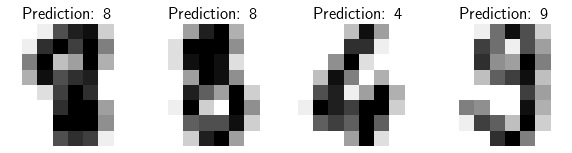

In [218]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, y_pred):
    ax.set_axis_off()
    image = image.reshape(8, 8)  # 1D 64 pixels to 2D 8*8 pixels for plotting
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction:.0f}")

#### How well did our model do overall?

In [219]:
overall_accuracy = metrics.accuracy_score(y_test, y_pred)
overall_accuracy

0.9688542825361512

97% accuracy is very good.

Let's do some quick error analysis using a [confusion matrix](https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix).

This shows how well the classification model did for each category.

The predictions are on the x-axis and the true labels from the test data are on the y-axis.

A perfect score would be where the predictions always match the true labels (i.e., all values are on the diagonal line).

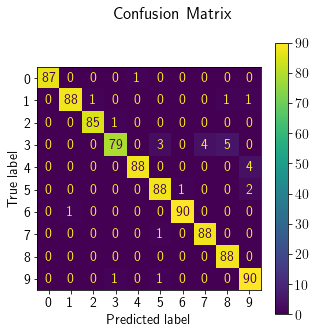

In [220]:
confusion_matrix = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
confusion_matrix.figure_.suptitle("Confusion Matrix")
plt.show()

We can see that the although the model did well, it struggled with 3's by confusing them with 5's, 7's, and 8's.

This points us in the direction of how we might improve the model.

In [246]:
from sklearn.model_selection import KFold, cross_val_score

In [247]:
cv = KFold(n_splits=5, shuffle=False)

In [248]:
test_scores = cross_val_score(model, X_train, y_train, cv=cv)

In [249]:
test_scores

array([0.93333333, 0.99444444, 0.90555556, 0.98882682, 0.95530726])

In [250]:
print(f"CV accuracy = {test_scores.mean():0.2f} (+/- {test_scores.std():0.2f})")

CV accuracy = 0.96 (+/- 0.03)


#### Save the model

### TensorFlow

Now, with [TensorFlow](https://www.tensorflow.org/datasets/keras_example):

In [132]:
from tensorflow.keras.datasets import mnist

Check whether there are any [GPUs](https://www.tensorflow.org/guide/gpu) available:

In [163]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


#### Load and split the data

In [133]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Take a look at some of the training data:

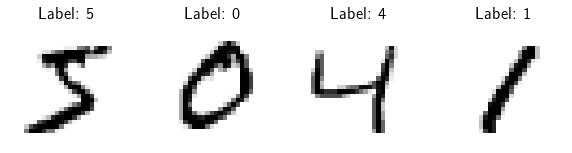

In [134]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, train_images, train_labels):
    ax.set_axis_off()
    image = image.reshape(28, 28)  # 1D 784 pixels to 2D 28*28 pixels for plotting
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Label: {label}")

#### Preprocess the data

In [135]:
def preprocess_data(data):
    data = tf.keras.layers.Flatten()(data)  # flatten the 2D image to a 1D tensor
    data = tf.keras.layers.Rescaling(1.0 / 255)(
        data
    )  # normalise the images to greyscale
    return data

In [136]:
train_images = preprocess_data(train_images)
test_images = preprocess_data(test_images)

#### Create the model

In [137]:
# Sequential API
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(train_images.shape[1],), name="input"),
        tf.keras.layers.Dense(128, activation="relu", name="layer1"),
        tf.keras.layers.Dense(128, activation="relu", name="layer2"),
        tf.keras.layers.Dense(10, activation="softmax", name="output"),
    ]
)

We can now also check the model summary and visualise the architecure:

In [138]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 128)               100480    
                                                                 
 layer2 (Dense)              (None, 128)               16512     
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


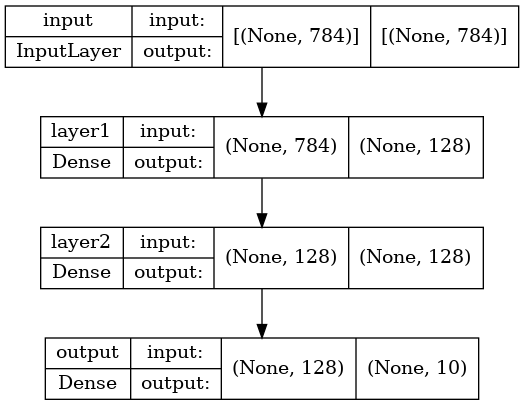

In [139]:
tf.keras.utils.plot_model(model, show_shapes=True)

#### Compile the model

It's useful to name the metrics, especially if there's more than one.

In [140]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy")],
)

#### Fit the model to the training data

The `fit()` call returns a `history` object.

Note, the `validation_split` keyword argument can only be used for NumPy training data.

In [141]:
history = model.fit(
    train_images,
    train_labels,
    epochs=2,  # how many runs through the data
    batch_size=64,  # how many samples in each batch
    verbose=False,  # print the output from each epoch
    validation_split=0.2,  # automatically set apart a validation set: 0.2 means 20% for validation
);

The `history.history` dictionary then contains the loss and metrics per epoch:

In [142]:
history.history

{'loss': [0.3003166913986206, 0.12102561444044113],
 'accuracy': [0.9135000109672546, 0.9635000228881836],
 'val_loss': [0.14494141936302185, 0.12661518156528473],
 'val_accuracy': [0.9571666717529297, 0.9633333086967468]}

#### Predictions

Use the model for predictions with [`model.predict()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict) (i.e., inference).

In [143]:
y_pred = model.predict(test_images)

Each prediction has a probability per category:

In [144]:
y_pred[0]

array([1.0907158e-05, 2.2225383e-07, 7.3242915e-04, 5.4335850e-04,
       1.1149862e-07, 1.0627698e-06, 7.4337797e-10, 9.9868184e-01,
       2.6121145e-06, 2.7425092e-05], dtype=float32)

The most likely category can be found by finding the maximum of these (using [`np.argmax`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html)):

In [145]:
np.argmax(y_pred[0])

7

So, the model things the first digit is a 7.

Let's plot the first four test digits with their predictions to see:

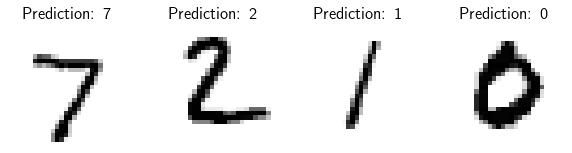

In [146]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, test_images, y_pred):
    ax.set_axis_off()
    image = tf.reshape(image, (28, 28))  # 1D 784 pixels to 2D 28*28 pixels for plotting
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {np.argmax(prediction):.0f}")

#### Let's now evaluate the model overall

In [147]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy (R2): {test_acc}")

313/313 [==============================] - 0s 741us/step - loss: 0.1232 - accuracy: 0.9627
Test accuracy (R2): 0.9627000093460083


Similar to scikit-learn an overall accuracy of 98% is very good.

A before, let's have a look at a confusion matrix for this.

_TensorFlow does have its own [`confusion_matrix`](https://www.tensorflow.org/api_docs/python/tf/math/confusion_matrix) method. Though I'll use the scikit-learn one here again as it has a nice plot feature._

In [148]:
confusion_matrix = metrics.ConfusionMatrixDisplay.from_predictions(
    test_labels, np.argmax(y_pred, axis=1)
)
confusion_matrix.figure_.suptitle("Confusion Matrix")
plt.show()

NameError: name 'metrics' is not defined

This model did well for most digits, though struggled a bit with 5's.

#### Save the model

A model includes:

- Architecture
- Weights (i.e., state)
- Configuration (e.g., optimiser, loss, metrics)

Can save the whole or parts.

Formats:

- [TensorFlow SavedModel](https://www.tensorflow.org/guide/saved_model): single archive (recommended)
    - Save: `model.save()` or `tf.keras.models.save_model()`
    - Load: `tf.keras.models.load_model()`
    - Keras H5 was the older format
- Architecture only (JSON)
    - Save: `get_config()` and `tf.keras.models.model_to_json()`
    - Load: `from_config()` and `tf.keras.models.model_from_json()`
- Weights only

In [158]:
import os
path_models = f"{os.getcwd()}/../models"

In [160]:
model.save(f"{path_models}/model_tf_mnist")

INFO:tensorflow:Assets written to: /home/earlacoa/repos/intro_ml/docs/../models/model_tf_mnist/assets


In [162]:
!ls {path_models}/model_tf_mnist

assets	keras_metadata.pb  saved_model.pb  variables


## Exercises

```{admonition} Exercise 1

...

```

## {ref}`Solutions <tools>`

## Key Points

```{important}

- [x] _..._

```

## Further information

### Good practices

- Debugging: 
    - Test each part individually, before testing the whole.
    - Check the model summary and visualise the architecture.
    - Use debug modes (e.g., add `run_eagerly=True` with the call to `fit()` in Keras.)
    - Tips for [Keras](https://keras.io/examples/keras_recipes/debugging_tips/).

### Other options

There are many other options, including:

- [XGBoost](https://xgboost.readthedocs.io/en/stable/)
    - Gradient boosting library.
- [LightGBM](https://lightgbm.readthedocs.io/en/latest/)
    - Gradient boosting library.
- [Caffe](https://caffe.berkeleyvision.org/)
    - Deep learning framework.
- ...

### Resources

...